### Uber Pickups Analysis Quiz

The question set is based on the August dataset, `uber-raw-data-aug14.csv`.

#### Keeping the dataset ready before questions

In [1]:
import pandas as pd

#df = pd.read_csv('./data/uber-raw-data-aug14.csv')
df = pd.read_csv('/content/drive/MyDrive/Copy of uber-raw-data-aug14.csv')
df.head()

,Date/Time,Lat,Lon,Base
0,8/1/2014 0:03:00,40.7366,-73.9906,B02512
1,8/1/2014 0:09:00,40.7260,-73.9918,B02512
2,8/1/2014 0:12:00,40.7209,-74.0507,B02512
3,8/1/2014 0:12:00,40.7387,-73.9856,B02512
4,8/1/2014 0:12:00,40.7323,-74.0077,B02512


#### Q1. On what date did we see the most number of Uber pickups?

**Skill Test:** Grouping & Counting

In [2]:
# Convert the 'Date/Time' column to datetime format
print("Convertingn'Date/Time' column to datetime format")
df['Date/Time'] = pd.to_datetime(df['Date/Time'])
print(type(df.loc[0,'Date/Time']))
print("-------------------------------------------")
# Group by date and count the number of pickups
print("Number of pickups by date")
pickupsCountByDate = df.groupby(df['Date/Time'].dt.date).size()
display(pickupsCountByDate.head())
print("--------------------------------------------")
# Find the date with the highest number of pickups
result = pickupsCountByDate.idxmax()
print("Date with the highest number of pickups =",result)



Convertingn'Date/Time' column to datetime format
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
-------------------------------------------
Number of pickups by date


Date/Time
2014-08-01    32353
2014-08-02    28678
2014-08-03    23146
2014-08-04    24952
2014-08-05    28094
dtype: int64

--------------------------------------------
Date with the highest number of pickups = 2014-08-07


#### Q.2 How many Uber pickups were made on the date with the highest number of pickups?

**Skill Test:** Indexing and filtering

In [3]:
# Get the count of pickups on the highest date
print("The count of pickups on the highest date are", pickupsCountByDate.max())



The count of pickups on the highest date are 32759


#### Q.3 How many unique TLC base companies are affiliated with the Uber pickups in the dataset?

**Skill Test:** Counting unique values

In [4]:
# Count the number of unique TLC base companies
#uniqueBaseCount = df['Base'].nunique()
uniqueBaseCount = df.groupby('Base').size().count()
print("Unique TLC base companies affiliated with the Uber pickups are",uniqueBaseCount)



Unique TLC base companies affiliated with the Uber pickups are 5


#### Q.4 Which TLC base company had the highest number of pickups?

**Skill Test:** Grouping, counting, and finding the maximum

In [5]:
# Group by TLC base company and count the number of pickups
uniqueBaseCount = df.groupby('Base').size()

# Find the TLC base company with the highest number of pickups
print(uniqueBaseCount.idxmax())

B02617


#### Q.5 How many Uber pickups were made at each unique TLC base company?

**Skill Test:** Grouping and counting

In [6]:
# Group by TLC base company and count the number of pickups

uniqueBaseCount = df.groupby('Base').size()
print(uniqueBaseCount)


Base
B02512     31472
B02598    220129
B02617    355803
B02682    173280
B02764     48591
dtype: int64


#### Q.6 Can you determine the busiest time of day for Uber pickups based on the date/time column?

**Skill Test:** Extracting time components, grouping, counting, and finding the maximum

In [7]:
# Extract the hour from the 'Date/Time' column
df['Hour'] = df['Date/Time'].dt.hour

# Group by hour and count the number of pickups
hourlyPickups = df.groupby('Hour').size()

# Find the hour with the highest number of pickups
print("Busiest time of day for Uber pickup is",hourlyPickups.idxmax(),"Hours")



Busiest time of day for Uber pickup is 17 Hours


#### Q.7 Can you create a visualization (e.g., a bar chart or line plot) to represent the number of Uber pickups over time?

**Skill Test:** Data Visualization using Plotting function

Text(0, 0.5, 'Pickups')

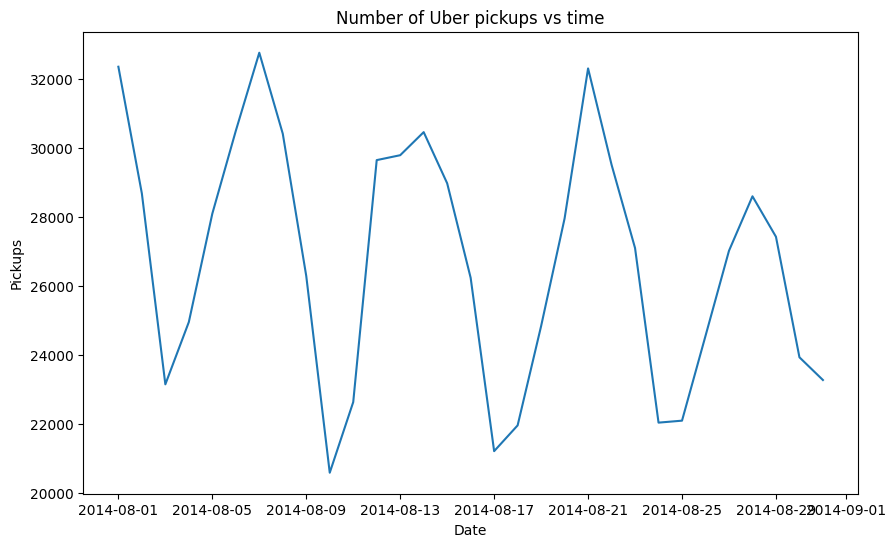

In [8]:
import matplotlib.pyplot as plt

# Group by date and count the number of pickups
df["Date"] = df['Date/Time'].dt.date
pickupsCountByDate = df.groupby('Date').size()

# Create a line plot to visualize the number of pickups over time
plt.title('Number of Uber pickups vs time')
pickupsCountByDate.plot(figsize=(10,6))
plt.ylabel('Pickups')

#### Q8. Can you create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude?

**Skill Test:** Scatter Plot

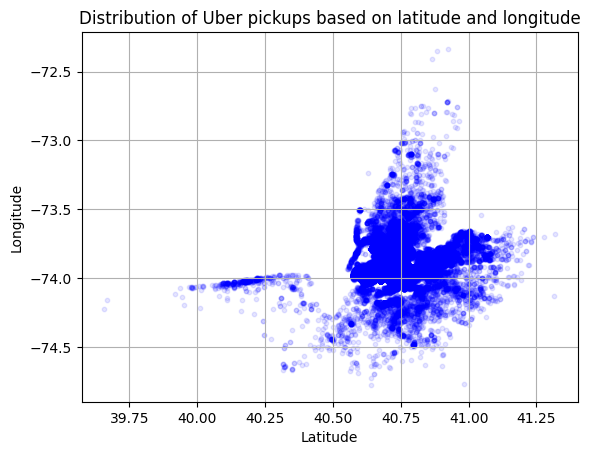

In [9]:
# Create a scatter plot to visualize the distribution of Uber pickups based on latitude and longitude
df.plot.scatter(x='Lat', y='Lon', color='blue', s=10, alpha=0.1, marker='o')
plt.title("Distribution of Uber pickups based on latitude and longitude")
plt.xlabel('Latitude')
plt.ylabel('Longitude')
plt.grid(True)
plt.show()


#### Q9. Can you create a bar chart to compare the number of Uber pickups for each TLC base company?

**Skill Test:** Bar Chart

Text(0, 0.5, 'No. of uber Pickups')

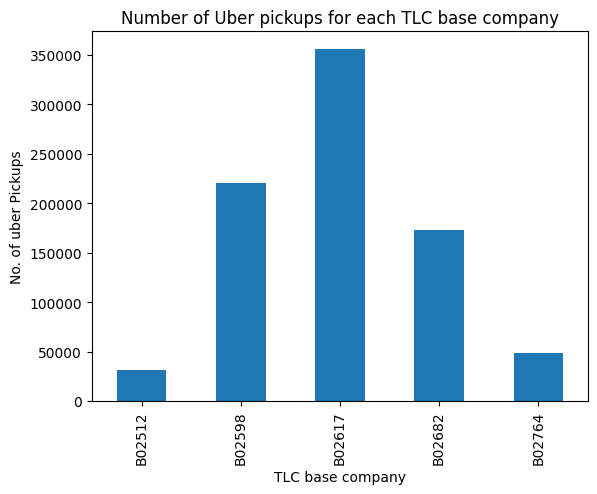

In [10]:
# Create a bar chart to compare the number of Uber pickups for each TLC base company
#plt.bar(uniqueBaseCount.index, uniqueBaseCount.values)
uniqueBaseCount.plot(kind = 'bar', title = 'Number of Uber pickups for each TLC base company')
plt.xlabel('TLC base company')
plt.ylabel('No. of uber Pickups')

#### Q10. Can you create a pie chart to display the percentage distribution of Uber pickups for each day of the week?

**Skill Test:** Pie Chart

Text(0.5, 1.0, 'Percentage distribution of Uber pickups for each day of the week')

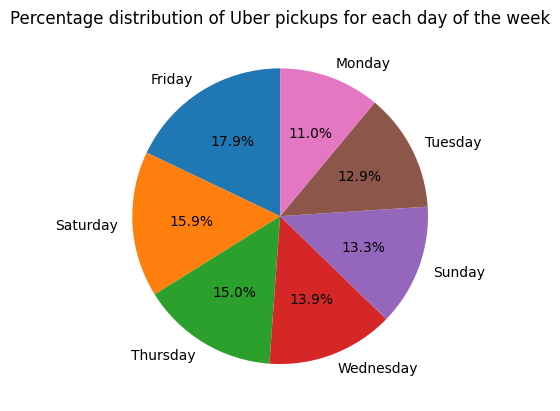

In [11]:
# Group by day of the week and count the number of pickups
pickupsByDay = df["Date/Time"].dt.day_name().value_counts()

# Create a pie chart to display the percentage distribution of Uber pickups for each day of the week
plt.pie(x = pickupsByDay.values, labels = pickupsByDay.index,
        autopct  = "%1.1f%%", startangle=90)
plt.title('Percentage distribution of Uber pickups for each day of the week')